# 🔗 Exploring Relationships Between Variables

This notebook builds on the previous EDA by exploring additional features  
that may influence passenger survival on the Titanic.

---

## 🎯 Purpose

To investigate how variables such as `SibSp`, `Parch`, `Fare`, and `Embarked`  
relate to survival, and identify possible patterns or correlations.

## 📦 Dataset

Same dataset as the previous notebook:  
[Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)  
via public repository: [Data Science Dojo GitHub](https://github.com/datasciencedojo/datasets)

📦 1. Load the Dataset

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. 📄 Feature Overview

## Focus Variables

This notebook focuses on the following variables:

| Column   | Description |
|----------|-------------|
| SibSp    | Number of siblings or spouses aboard |
| Parch    | Number of parents or children aboard |
| Fare     | Ticket fare paid by the passenger |
| Embarked | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

*For full feature descriptions, refer to the previous notebook.*

3. 📊 Basic Statistics & Missing Values

In [49]:
# Summary info
df.info()

# Descriptive statistics
df.describe()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

4. 📈 Visualizing Variable Relationships

4-1. Siblings/Spouses Aboard (SibSp)

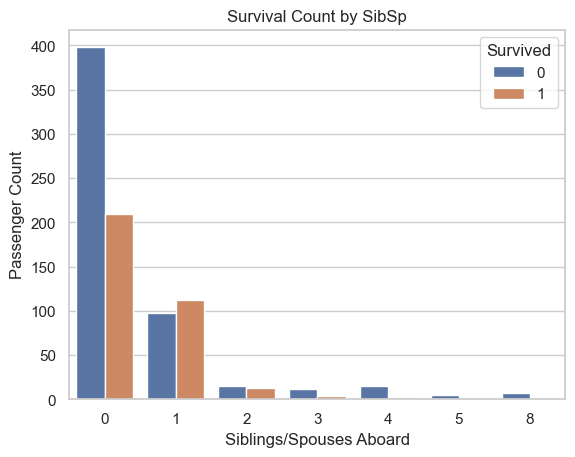

In [50]:
# Step 1: Count-based visualization
# Initial attempt to explore the relationship between SibSp and survival
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival Count by SibSp')
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Passenger Count')
plt.show()

Observation:<br>
We initially visualized the relationship between the number of siblings/spouses (SibSp) and survival rate using a count plot.

This led to two possible interpretations:

1. Groups with 2 or fewer siblings/spouses appear to have higher survival rates.

2. However, this might simply reflect the fact that these groups are more common overall,<br>not necessarily that they had better survival odds.

Because of this ambiguity, we decided to revise the code and explore the data further to gain a clearer understanding.

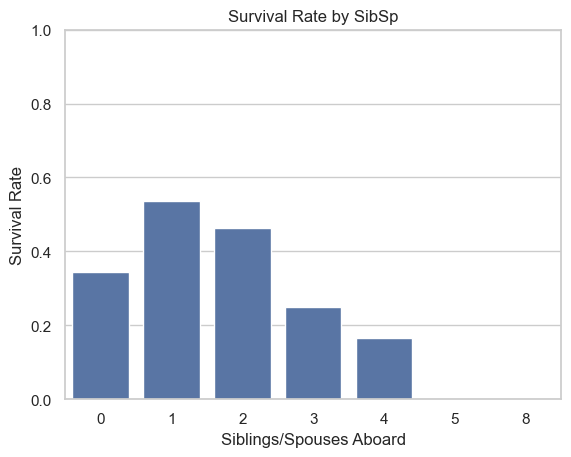

In [51]:
# Step 2: Proportion-based visualization
# Re-visualizing using survival rate to better understand the relationship
sibsp_rate = df.groupby('SibSp')['Survived'].mean().reset_index()

sns.barplot(x='SibSp', y='Survived', data=sibsp_rate)
plt.title('Survival Rate by SibSp')
plt.ylabel('Survival Rate')
plt.xlabel('Siblings/Spouses Aboard')
plt.ylim(0, 1)
plt.show()
# → This refined plot helps reveal the actual survival rate for each SibSp group,
# removing the influence of group size in raw counts.

- Passengers with 1–2 siblings or spouses had the highest survival rates.<br>
- Interestingly, those traveling alone had slightly lower survival rates,<br>
while passengers with larger families (3 or more) showed the poorest outcomes.

4-2. Parents/Children Aboard (Parch)

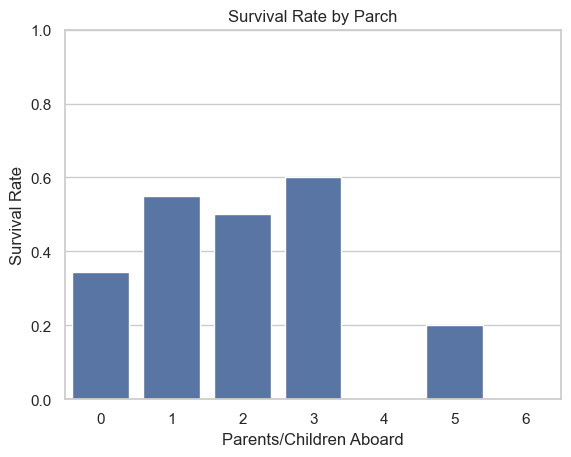

In [52]:
# Survival count by number of parents/children aboard (Parch)
# As with SibSp, raw counts may be misleading due to group size imbalance.
# So, visualizing survival rate instead of count.
parch_rate = df.groupby('Parch')['Survived'].mean().reset_index()

sns.barplot(x='Parch', y='Survived', data=parch_rate)
plt.title('Survival Rate by Parch')
plt.ylabel('Survival Rate')
plt.xlabel('Parents/Children Aboard')
plt.ylim(0, 1)
plt.show()

- Survival rates were highest among passengers traveling with 1–3 parents or children.  
- Traveling alone or with large family groups (4 or more) was associated with much lower survival.  
- showing a similar pattern to what was observed with the SibSp variable.

4-3. Ticket Fare (Fare)

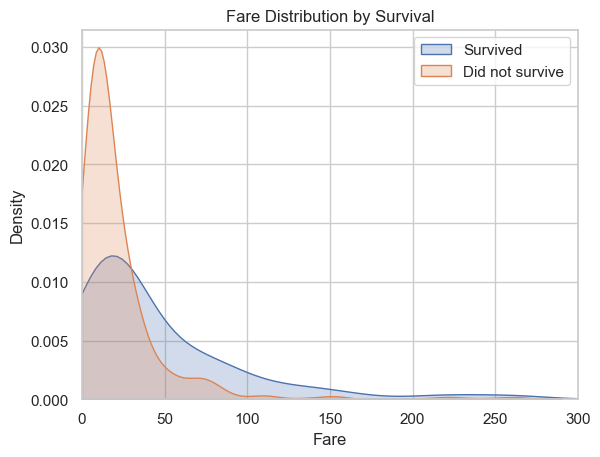

In [53]:
# Distribution of Fare by survival status
# Since Fare is a continuous variable, we use KDE plots to compare distributions
sns.kdeplot(data=df[df['Survived'] == 1]['Fare'], label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Fare'], label='Did not survive', fill=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 300)
plt.show()

- Passengers who paid lower fares (especially under 50) had much lower survival rates.
- Those who paid higher fares had consistently higher survival rates.

4-4. Port of Embarkation (Embarked)

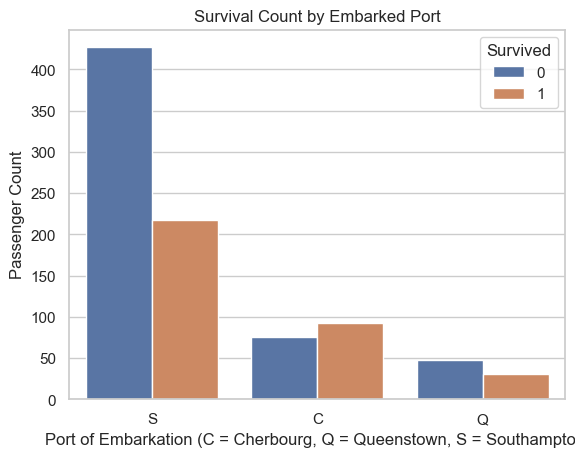

In [54]:
# Survival count by embarkation port
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Passenger Count')
plt.show()

- Survival rates varied by embarkation port, with Cherbourg (C) showing the highest proportion of survivors,  
while Southampton (S) had the lowest.

## 🧠 Summary

- **SibSp**: Passengers with 1–2 siblings/spouses had the highest survival rates.  
  Those traveling alone or with large families (≥3) had lower survival, likely due to evacuation difficulty.

- **Parch**: A similar pattern was observed—survival peaked with 1–3 parents/children aboard.  
  Traveling alone or with large families again corresponded with lower survival.

- **Fare**: Survival increased with ticket fare.  
  Passengers who paid lower fares (under 50) were much less likely to survive.

- **Embarked**: Cherbourg (C) passengers had the highest survival proportion,  
  while Southampton (S) had the lowest.

This notebook completes the EDA of all major variables in the Titanic dataset.  
In the next step, we’ll handle missing data—particularly in variables like `Age`, `Cabin`, and `Embarked`—  
to prepare the dataset for deeper analysis and modeling.